[1.] [Z(6) @ I(7) @ I(8)]
[1.] [I(6) @ Z(7) @ I(8)]
[ 0.5  0.5  0.5 -0.5] [I(6) @ I(7) @ Z(8), I(6) @ Z(7) @ Z(8), Z(6) @ I(7) @ Z(8), Z(6) @ Z(7) @ Z(8)]
[ 0.5  0.5  0.5 -0.5] [X(6) @ I(7) @ I(8), X(6) @ I(7) @ X(8), X(6) @ Z(7) @ I(8), X(6) @ Z(7) @ X(8)]
[ 0.5  0.5  0.5 -0.5] [I(6) @ X(7) @ I(8), I(6) @ X(7) @ X(8), Z(6) @ X(7) @ I(8), Z(6) @ X(7) @ X(8)]
[1.] [I(6) @ I(7) @ X(8)]


/home/valter/.local/lib/python3.10/site-packages/pennylane/drawer/mpldrawer.py:581: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from current font.
  bbox = text_obj.get_window_extent(renderer)
/home/valter/.local/lib/python3.10/site-packages/pennylane/drawer/mpldrawer.py:581: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from current font.
  bbox = text_obj.get_window_extent(renderer)
/home/valter/.local/lib/python3.10/site-packages/pennylane/drawer/mpldrawer.py:581: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from current font.
  bbox = text_obj.get_window_extent(renderer)
/home/valter/.local/lib/python3.10/site-packages/pennylane/drawer/mpldrawer.py:581: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from current font.
  bbox = text_obj.get_window_extent(renderer)
/home/valter/.local/lib/python3.10/site-packages/pennylane/drawer/mpldrawer.py:581: UserWarning: Glyph 1

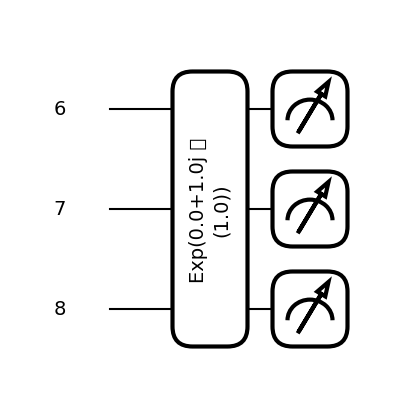

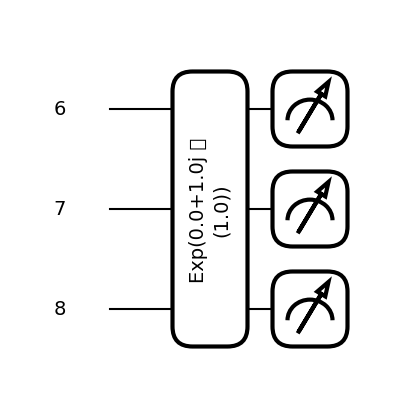

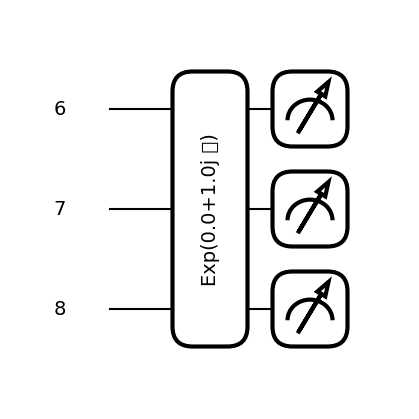

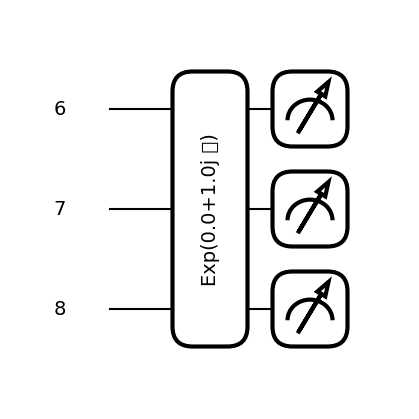

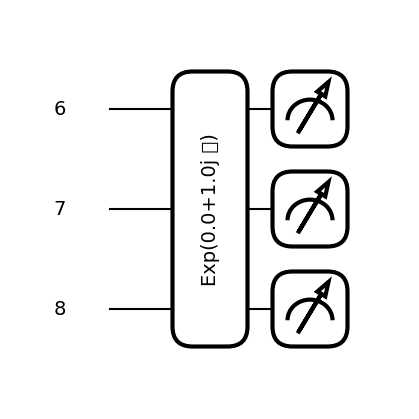

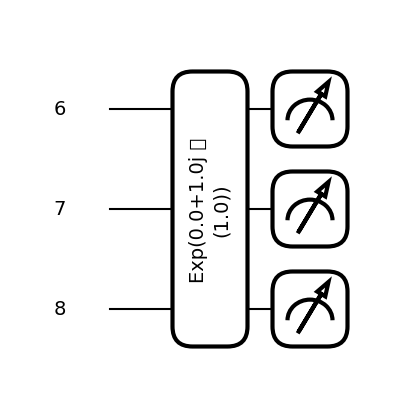

In [1]:
import pennylane as qml
import numpy as np

# Using the notation in the paper
# input0 -> 0
# input1 -> 1
# input2 -> 2
# ancilla0 -> 3
# ancilla1 -> 4
# ancilla2 -> 5
# output0 -> 6
# output1 -> 7
# output2 -> 8

# Get matrix for toffoli gate
def get_toffoli_matrix():
    return np.array(qml.Toffoli(wires=[0,1,2]).matrix())

X0 = qml.PauliX(0)
Z0 = qml.PauliZ(0)
X1 = qml.PauliX(1)
Z1 = qml.PauliZ(1)
X2 = qml.PauliX(2)
Z2 = qml.PauliZ(2)
I0 = qml.Identity(0)
I1 = qml.Identity(1)
I2 = qml.Identity(2)

basis = [Z0 @ I1 @ I2, 
        I0 @ Z1 @ I2,
        I0 @ I1 @ Z2,
        X0 @ I1 @ I2,
        I0 @ X1 @ I2,
        I0 @ I1 @ X2]

results = []
for b in basis:
    results.append(get_toffoli_matrix() @ b.matrix() @ get_toffoli_matrix())
    
pauli_decomposed = []

for result in results:
    pauli_decomposed.append(qml.pauli_decompose(result, wire_order=[6, 7, 8]))
    
hamiltonians = []

for p in pauli_decomposed:
    print(p.coeffs, p.ops)

# Braket and qiskit aer are able to visualize the decompositions
#dev = qml.device("braket.local.qubit", wires=[6, 7, 8], shots=1)
#dev = qml.device("qiskit.aer", wires=[6, 7, 8], shots=1)
dev = qml.device("default.qubit", wires=[6, 7, 8], shots=1)

@qml.qnode(dev)
def circuit(p):
    hamiltonian = qml.Hamiltonian(p.coeffs, p.ops)
    if len(p.coeffs) == 1:
        qml.exp(hamiltonian, num_steps=1, coeff=1j)
    else:
        qml.exp(hamiltonian, num_steps=1, coeff=1j)
    return qml.sample()

for i, p in enumerate(pauli_decomposed):
    qml.draw_mpl(circuit, expansion_strategy="device", show_all_wires=True, decimals=1)(p)

In [2]:
def controlled_circuit1(target_qubits, coeff = 2.0):
    #qml.RZ(coeff, wires=target_qubits[0])
    qml.PauliZ(wires=target_qubits[0])


def controlled_circuit2(coeff = 1.0):
    # (0.5) [I0 I1 Z2]
    qml.RZ(coeff, wires=8)
    #qml.S(wires=8)
    
    # (0.5) [I0 Z1 Z2]
    qml.CNOT(wires=[8, 7])
    qml.RZ(coeff, wires=7)
    #qml.S(wires=7)
    qml.CNOT(wires=[8, 7])
    
    # (0.5) [Z0 I1 Z2]
    qml.CNOT(wires=[8, 6])
    qml.RZ(coeff, wires=6)
    #qml.S(wires=6)
    qml.CNOT(wires=[8, 6])
    
    # (-0.5) [Z0 Z1 Z2]
    qml.CNOT(wires=[8, 7])
    qml.CNOT(wires=[7, 6])
    qml.RZ(-coeff, wires=6)
    qml.CNOT(wires=[7, 6])
    qml.CNOT(wires=[8, 7])
    
    

def controlled_circuit3(coeff = 1.0):
    qml.Hadamard(wires=6)
    qml.Hadamard(wires=8)
    
    qml.RZ(coeff, wires=6)
    #qml.S(wires=6)
    
    qml.CNOT(wires=[8, 6])
    qml.RZ(coeff, wires=6)
    #qml.S(wires=6)
    qml.CNOT(wires=[8, 6])
    
    qml.CNOT(wires=[7, 6])
    qml.RZ(coeff, wires=6)
    #qml.S(wires=6)
    qml.CNOT(wires=[7, 6])
    
    qml.CNOT(wires=[8, 7])
    qml.CNOT(wires=[7, 6])
    qml.RZ(-coeff, wires=6)
    qml.CNOT(wires=[7, 6])
    qml.CNOT(wires=[8, 7])
    
    qml.Hadamard(wires=6)
    qml.Hadamard(wires=8)
    
def controlled_circuit4(coeff = 1.0):
    qml.Hadamard(wires=7)
    qml.Hadamard(wires=8)
    
    qml.RZ(coeff, wires=7)
    #qml.S(wires=7)
    
    qml.CNOT(wires=[8, 7])
    qml.RZ(coeff, wires=7)
    #qml.S(wires=7)
    qml.CNOT(wires=[8, 7])
    
    qml.CNOT(wires=[7, 6])
    qml.RZ(coeff, wires=6)
    #qml.S(wires=6)
    qml.CNOT(wires=[7, 6])
    
    qml.CNOT(wires=[8, 7])
    qml.CNOT(wires=[7, 6])
    qml.RZ(-coeff, wires=6)
    qml.CNOT(wires=[7, 6])
    qml.CNOT(wires=[8, 7])
    
    qml.Hadamard(wires=7)
    qml.Hadamard(wires=8)
    
def controlled_circuit5(coeff = 2.0):
    qml.Hadamard(wires=8)
    qml.RZ(coeff, wires=8)
    #qml.PauliZ(wires=8)
    qml.Hadamard(wires=8)


(<Figure size 1500x400 with 1 Axes>, <Axes: >)

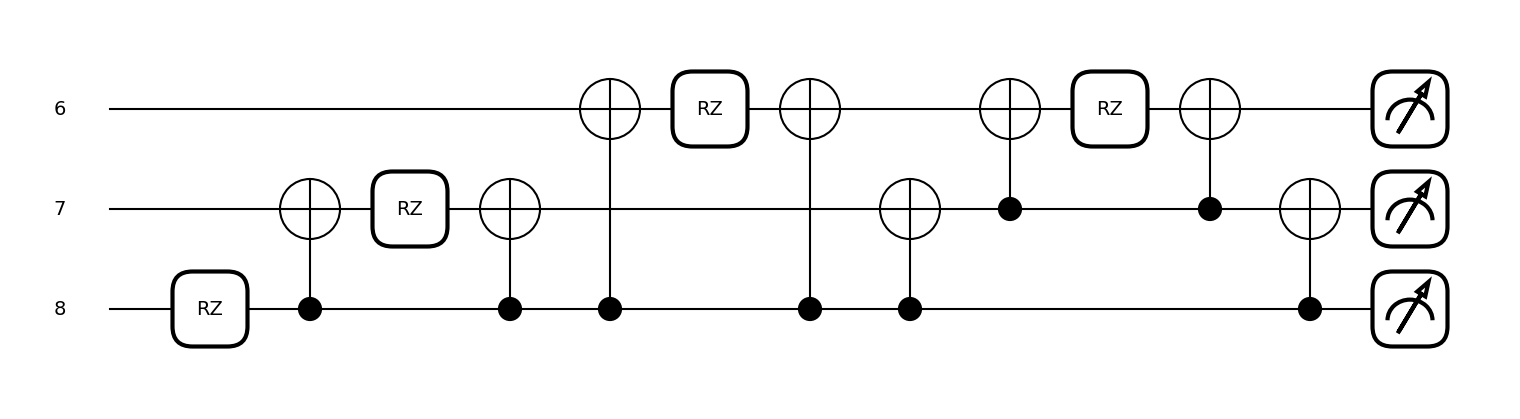

In [3]:
# To visualize and debug the circuits
@qml.qnode(dev)
def circuit2():
    controlled_circuit2(np.pi/2)
    return qml.sample()

qml.draw_mpl(circuit2)()

In [4]:
dev = qml.device("default.qubit", wires=[0, 1, 2, 3, 4, 5, 6, 7, 8])
values = np.random.rand(9)

def bell_pair(source, target):
    qml.Hadamard(wires=source)
    qml.CNOT(wires=[source, target])
    
def bell_measurement(source, target):
    qml.CNOT(wires=[source, target])
    qml.Hadamard(wires=source)

@qml.qnode(dev)
def toffoli_teleportation():
    # Prepare the random input state for Toffoli gate
    
    qml.Rot(values[0], values[1], values[2], wires=0)
    qml.Rot(values[3], values[4], values[5], wires=1)
    qml.Rot(values[6], values[7], values[8], wires=2)
    
    # Prepare Bell pairs
    bell_pair(3, 6)
    bell_pair(4, 7)
    bell_pair(5, 8)
    
    #Prepare the Bell measurement
    bell_measurement(0, 3)
    bell_measurement(1, 4)
    bell_measurement(2, 5)
    
    # Perform the Toffoli gate on the output qubits
    qml.Toffoli(wires=[6, 7, 8])
    
    # Perform the Bell measurement
    m0 = qml.measure([0], reset=True)
    m1 = qml.measure([1], reset=True)
    m2 = qml.measure([2], reset=True)
    a0 = qml.measure([3], reset=True)
    a1 = qml.measure([4], reset=True)
    a2 = qml.measure([5], reset=True)
    
    glob_coeff = np.pi/2
    qml.cond(m0, controlled_circuit1)([6], coeff=2*glob_coeff)
    qml.cond(m1, controlled_circuit1)([7], coeff=2*glob_coeff)
    qml.cond(m2, controlled_circuit2)(coeff=glob_coeff)
    qml.cond(a0, controlled_circuit3)(coeff=glob_coeff)
    qml.cond(a1, controlled_circuit4)(coeff=glob_coeff)
    qml.cond(a2, controlled_circuit5)(coeff=2*glob_coeff)
    
    return qml.density_matrix(wires=[6, 7, 8])

(<Figure size 7200x1200 with 1 Axes>, <Axes: >)

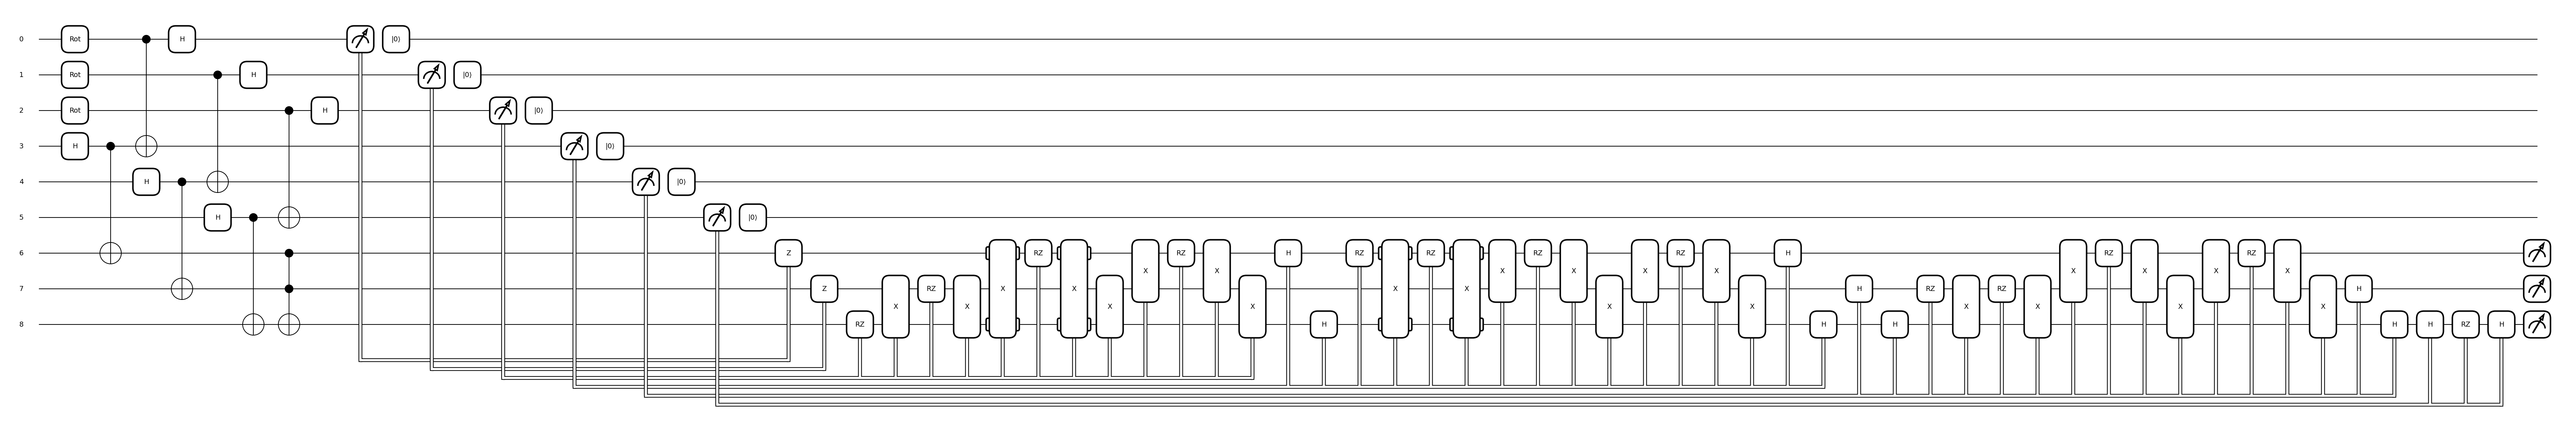

In [5]:
qml.draw_mpl(toffoli_teleportation)()

In [6]:
results = toffoli_teleportation()
#print(results)

In [7]:
@qml.qnode(dev)
def toffoli_teleportation2():
    qml.Rot(values[0], values[1], values[2], wires=0)
    qml.Rot(values[3], values[4], values[5], wires=1)
    qml.Rot(values[6], values[7], values[8], wires=2)
    qml.Toffoli(wires=[0, 1, 2])
    return qml.density_matrix(wires=[0, 1, 2])

#print(toffoli_teleportation2())

# Compare that the density matrix from the teleportation circuit is 
# the same as the one when the Toffoli gate is applied directly
print(np.allclose(results, toffoli_teleportation2()))

True
